<a href="https://colab.research.google.com/github/cown0211/Kaggle-DACON/blob/main/%EC%A4%91%EA%B3%A0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 드라이브로 공유된 원본 데이터 다운
!pip install gdown
!gdown --id 1nXaRATO88R_64tPbsUuOMOMWrcA5w-YH --output train.csv
!gdown --id 1FKa80by_pQ4a5iMEdGNJ4VuOqSF-z807 --output test.csv
!gdown --id 1ZmiQX35fkO90yQDxK5HH5xp7tcz1NPHd --output sub.csv

# 경로 옮기기
!mkdir /content/drive/MyDrive/Dacon/중고차가격예측경진대회/data
!mv /content/train.csv /content/drive/MyDrive/Dacon/중고차가격예측경진대회/data
!mv /content/test.csv /content/drive/MyDrive/Dacon/중고차가격예측경진대회/data
!mv /content/sub.csv /content/drive/MyDrive/Dacon/중고차가격예측경진대회/data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nXaRATO88R_64tPbsUuOMOMWrcA5w-YH
To: /content/train.csv
100% 96.8k/96.8k [00:00<00:00, 82.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FKa80by_pQ4a5iMEdGNJ4VuOqSF-z807
To: /content/test.csv
100% 37.9k/37.9k [00:00<00:00, 49.9MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don'

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 읽기
path = "/content/drive/My Drive/Dacon/중고차가격예측경진대회/data/"

train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
sub = pd.read_csv(path + "sub.csv")

In [ ]:
# 결측치 및 데이터 타입 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB


  
11개 열 중에 0번 열은 id이므로 삭제  
target이 가격


In [ ]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [ ]:
# id 겹치는 경우 없음 -> 열삭제
train["id"].value_counts()

train.drop("id", axis = 1, inplace = True)

test.drop("id", axis = 1, inplace = True)

In [ ]:
train["title"].value_counts()
# title 변수의 경우 "사명 차종"의 형태로 저장돼있음 -> 브랜드 변수 생성

Toyota Camry             129
Toyota Corolla           108
Toyota Highlander         50
Toyota Sienna             49
Toyota RAV 4              40
                        ... 
Scania P94 FLATBED         1
Mercedes-Benz GLA 250      1
Acura ZDX                  1
Iveco TRUCK                1
DAF CF                     1
Name: title, Length: 203, dtype: int64

In [ ]:
train["brand"] = train["title"].apply(lambda x: x.split()[0])
test["brand"] = test["title"].apply(lambda x: x.split()[0])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd854fbb850>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd854fa3910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8551023d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd854fb8410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd854fbbe50>,
  <matplotlib.lines.Line2D at 0x7fd854fa33d0>]}

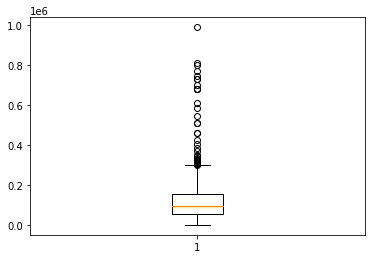

In [ ]:
plt.boxplot(train["odometer"])
# 주행거리

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


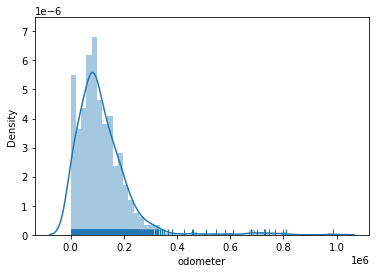

In [ ]:
sns.distplot(train["odometer"], kde=True, rug=True)

In [ ]:
train.iloc[:, [1,9]].sort_values(by=["odometer"])

,odometer,target
1014,0,10015000
392,0,9215000
429,0,12015000
372,0,1715000
483,0,1855000
...,...,...
46,745932,5515000
70,768456,8015000
610,798469,12015000
1009,809456,26015000


In [ ]:
train["odometer"].describe()

count      1013.000000
mean     116171.015795
std      104147.052690
min           0.000000
25%       55775.000000
50%       94803.000000
75%      152878.000000
max      987322.000000
Name: odometer, dtype: float64

In [ ]:
print("max:", train["odometer"].max(), "\n",
      "min:", train["odometer"].min(), "\n",
      "mean:", train["odometer"].mean(), "\n",
      "median:", train["odometer"].median())

max: 987322 
 min: 0 
 mean: 116842.12118226601 
 median: 94972.0


In [ ]:
train["location"].value_counts()

Lagos          792
Abuja          146
Ogun            26
Lagos           23
Lagos State     16
other            4
FCT              2
Accra            1
Abuja            1
Abia State       1
Adamawa          1
Abia             1
Ogun State       1
Name: location, dtype: int64

In [ ]:
test["location"].value_counts()

Lagos    355
Abuja     69
Ogun      10
other      2
Name: location, dtype: int64

In [ ]:
train["location"].replace({"Lagos ": "Lagos",
                           "Lagos State": "Lagos",
                           "FCT": "Abuja",
                           "Abuja ": "Abuja",
                           "Ogun State": "Ogun",
                           "Abia": "other",
                           "Abia State": "other",
                           "Accra": "other",
                           "Adamawa ": "other"}, inplace = True)

test["location"].replace({"Lagos State": "Lagos",
                          "Lagos ": "Lagos",
                          "Mushin": "Lagos",
                          "Abuja ": "Abuja", 
                          "Ogun State": "Ogun",
                          "Arepo ogun state ": "Ogun",
                          "Abia": "other"}, inplace = True)

In [ ]:
train["isimported"].value_counts()

Foreign Used    744
Locally used    248
New              23
Name: isimported, dtype: int64

In [ ]:
train["engine"].value_counts()

4-cylinder(I4)    618
6-cylinder(V6)    222
6-cylinder(I6)    118
8-cylinder(V8)     49
3-cylinder(I3)      3
4-cylinder(H4)      2
5-cylinder(I5)      2
2-cylinder(I2)      1
Name: engine, dtype: int64

In [ ]:
test["engine"].value_counts()

4-cylinder(I4)      278
6-cylinder(V6)       89
6-cylinder(I6)       44
8-cylinder(V8)       21
5-cylinder(I5)        1
2-cylinder(I2)        1
12-cylinder(V12)      1
3-cylinder(I3)        1
Name: engine, dtype: int64

In [ ]:
train["transmission"].value_counts()

automatic    965
manual        50
Name: transmission, dtype: int64

In [ ]:
train["fuel"].value_counts()

petrol    970
diesel     45
Name: fuel, dtype: int64

In [ ]:
train["paint"].value_counts()
# 색깔의 가지수가 너무 많아 전처리 필요

Black          292
White          115
Silver         103
Grey            84
Blue            70
              ... 
WINE             1
Silver/grey      1
Ink blue         1
Light blue       1
Off white l      1
Name: paint, Length: 76, dtype: int64

In [ ]:
train["paint"] = train["paint"].str.lower()
train["paint"] = train["paint"].str.strip()

train["paint"].replace({"gray": "grey",
                        "redl": "red",
                        "black/red": "black",
                        "deep blue": "blue",
                        "dark grey": "grey",
                        "dark blue": "blue",
                        "dark gray": "grey",
                        "midnight black metal": "black",
                        "dark ash": "grey",
                        "white orchild pearl": "white",
                        "milk": "white",
                        "dark green": "green",
                        "light gold": "gold",
                        "white-blue": "white",
                        "magnetic gray": "grey",
                        "dark silver": "silver",
                        "black.": "black",
                        "silver/grey": "grey",
                        "ink blue": "blue",
                        "light blue": "blue",
                        "sky blue": "blue",
                        "gery": "grey",
                        "pale brown": "brown",
                        "whine": "wine",
                        "black and silver": "black",
                        "light silver": "silver",
                        "black sand pearl": "black",
                        "off white": "white",
                        "ash": "grey",
                        "maroon": "wine",
                        "navy blue": "blue",
                        "super white": "white",
                        "ash and black": "grey",
                        "magnetic gray metallic": "grey",
                        "skye blue": "blue",
                        "off white l": "white"}, inplace = True)


test["paint"] = test["paint"].str.lower()
test["paint"] = test["paint"].str.strip()

test["paint"].replace({"gray": "grey",
                       "redl": "red",
                       "black/red": "black",
                       "deep blue": "blue",
                       "dark grey": "grey",
                       "dark blue": "blue",
                       "dark gray": "grey",
                       "midnight black metal": "black",
                       "dark ash": "grey",
                       "white orchild pearl": "white",
                       "milk": "white",
                       "dark green": "green",
                       "light gold": "gold",
                       "white-blue": "white",
                       "magnetic gray": "grey",
                       "dark silver": "silver",
                       "black.": "black",
                       "silver/grey": "grey",
                       "ink blue": "blue",
                       "light blue": "blue",
                       "sky blue": "blue",
                       "gery": "grey",
                       "pale brown": "brown",
                       "whine": "wine",
                       "black and silver": "black",
                       "light silver": "silver",
                       "black sand pearl": "black",
                       "off white": "white",
                       "ash": "grey",
                       "maroon": "wine",
                       "navy blue": "blue",
                       "super white": "white",
                       "ash and black": "grey",
                       "magnetic gray metallic": "grey",
                       "skye blue": "blue",
                       "off white l": "white",
                       "white and green": "white",
                       "light grey": "grey",
                       "blac": "black",
                       "golf": "green",
                       "indigo ink pearl": "blue",
                       "grey and black": "grey",
                       "mint green": "green",
                       "classic silver met(1f7)": "silver"}, inplace = True)

In [ ]:
train["paint"].unique()

array(['red', 'black', 'grey', 'white', 'blue', 'silver', 'brown',
       'green', 'purple', 'gold', 'beige', 'orange', 'cream', 'sliver',
       'yellow', 'wine'], dtype=object)

In [ ]:
test["paint"].unique()

array(['white', 'black', 'grey', 'red', 'silver', 'blue', 'gold', 'green',
       'sliver', 'cream', 'brown', 'yellow', 'wine', 'beige'],
      dtype=object)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd854ee8250>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd854eed350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd854ef5390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd854eede10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd854ee8810>,
  <matplotlib.lines.Line2D at 0x7fd854ee8d50>]}

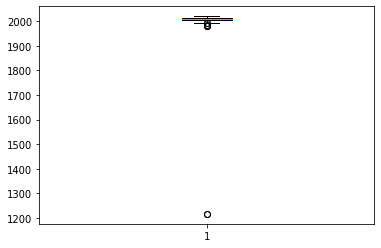

In [ ]:
plt.boxplot(train["year"])
# 1200년대 제작... 삭제...

In [ ]:
train.drop(train.loc[train["year"] <= 1500].index, inplace = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd85355d610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd8535652d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd85356d310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd853565d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd85355db50>,
  <matplotlib.lines.Line2D at 0x7fd85355d290>]}

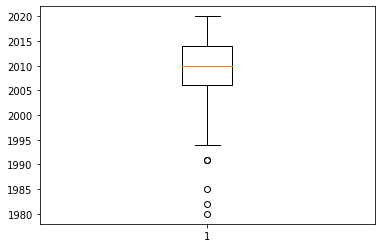

In [ ]:
plt.boxplot(train["year"])
# 쳐내니 나음

In [ ]:
test.drop(test.loc[test["year"] <= 1900].index, inplace = True)
test.drop(test.loc[test["year"] >= 2100].index, inplace = True)


{'boxes': [<matplotlib.lines.Line2D at 0x7fd84e878890>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd84e5287d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd84e7b5f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd84e7b5b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd84e801210>,
  <matplotlib.lines.Line2D at 0x7fd84e801dd0>]}

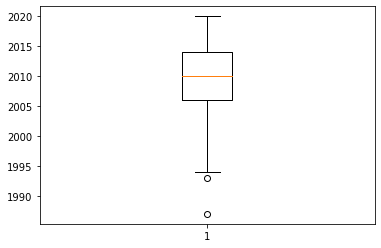

In [ ]:
plt.boxplot(test["year"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


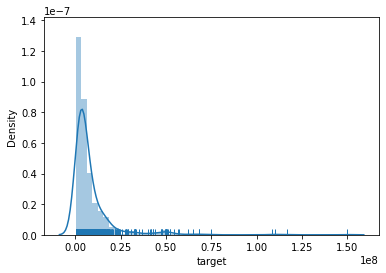

In [ ]:
sns.distplot(train["target"], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


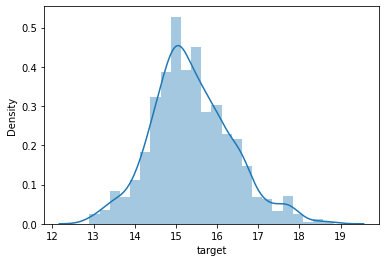

In [ ]:
sns.distplot(np.log(train["target"]), kde=True)

In [ ]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

le = make_label_map(train)
train = label_encoder(train, le)
train.head()

{'title': {'unknown': 0, 'Toyota RAV 4': 1, 'Toyota Land Cruiser': 2, 'Land Rover Range Rover Evoque': 3, 'Lexus ES 350': 4, 'Toyota Venza': 5, 'Toyota Corolla': 6, 'Land Rover Range Rover Sport': 7, 'Pontiac Vibe': 8, 'Toyota Tacoma': 9, 'Lexus RX 350': 10, 'Ford Escape': 11, 'Honda Civic': 12, 'Volvo XC90': 13, 'BMW 750': 14, 'Infiniti JX': 15, 'Honda Accord': 16, 'Mercedes-Benz ML 350': 17, 'Toyota Camry': 18, 'Hyundai Azera': 19, 'Lexus GX 460': 20, 'BMW 325': 21, 'Toyota Sienna': 22, 'Honda Fit': 23, 'Honda CR-V': 24, 'Hyundai Tucson': 25, 'Ford Transit': 26, 'Jaguar XJ8': 27, 'BMW X6': 28, 'Mercedes-Benz C 300': 29, 'Mitsubishi Galant': 30, 'Mercedes-Benz GL 450': 31, 'Lexus RX 300': 32, 'Toyota Highlander': 33, 'Mitsubishi CANTER PICK UP': 34, 'Nissan Titan': 35, 'Lexus IS 250': 36, 'Mercedes-Benz 200': 37, 'Toyota Sequoia': 38, 'Ford Explorer': 39, 'Hyundai ix35': 40, 'Mack CH613 CONVENTIONAL CAB': 41, 'Lexus CT 200h': 42, 'Lexus LX 570': 43, 'Toyota Avensis': 44, 'Toyota 4-Run

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,1,18277,1,1,1,1,1,1,2016,13665000,1
1,2,10,1,2,1,1,1,2,2019,33015000,1
2,3,83091,1,1,2,1,1,1,2012,9915000,2
3,4,91524,1,1,1,1,1,3,2007,3815000,3
4,5,94177,1,1,2,1,1,1,2010,7385000,1


In [ ]:
train_X = train.drop(["target"], axis = 1)
train_Y = train.target

test_X = test

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#모델들을 할당할 리스트를 만들어줍니다.
models = []

#모델들을 각각 할당하여 리스트에 추가합니다.
models.append(ExtraTreesRegressor(n_estimators=110))
models.append(RandomForestRegressor(n_estimators=110))
models.append(GradientBoostingRegressor(learning_rate=0.22, criterion='mae'))

#모델들을 할당한 리스트를 불러와 순차적으로 train 데이터에 학습을 시켜줍니다.
for model in models:
    model.fit(train_X, train_Y)

In [ ]:
test_X = label_encoder(test_X, le)

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
y_pred = np.append(y_pred, np.array([0, 0, 0]))

In [ ]:
sub["target"] = y_pred

In [ ]:
sub.to_csv(path + "submit2.csv", index=False)